1️⃣ Setup & Imports


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import joblib


2️⃣ Load Dataset (Download OR Static Path)

In [2]:
DATA_URL = "https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv"

df = pd.read_csv(DATA_URL)
df.head()
# Uncomment if using local file
# df = pd.read_csv("data/Advertising.csv")


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


3️⃣ Basic Data Exploration

In [13]:
df.info()
df.describe()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


4️⃣ Business Question Framing (Markdown cell)
### Business Question
Can we predict **Sales** based on advertising spend across:
- TV
- Radio
- Newspaper?


5️⃣ Filters on the Data (Notebook Pain Point)

In [3]:
# Example filter
filtered_df = df[df["TV"] > 100]
filtered_df.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
7,8,120.2,19.6,11.6,13.2
9,10,199.8,2.6,21.2,10.6


6️⃣ Visualization 1: Distribution of Sales

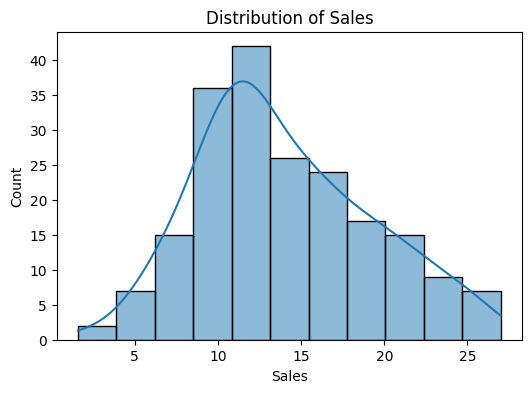

In [4]:
plt.figure(figsize=(6,4))
sns.histplot(df["Sales"], kde=True)
plt.title("Distribution of Sales")
plt.show()


7️⃣ Visualization 2: Advertising Spend vs Sales

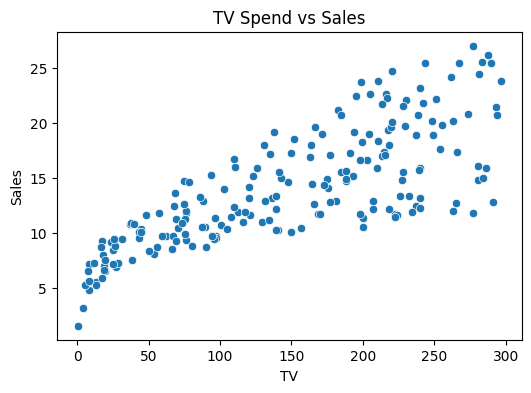

In [5]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="TV", y="Sales", data=df)
plt.title("TV Spend vs Sales")
plt.show()


8️⃣ Visualization 3: Correlation Heatmap

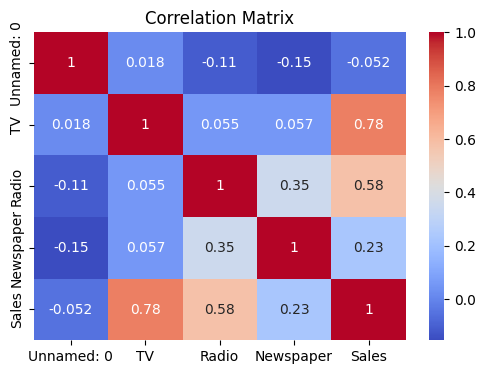

In [6]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


9️⃣ More Filters + Visualization

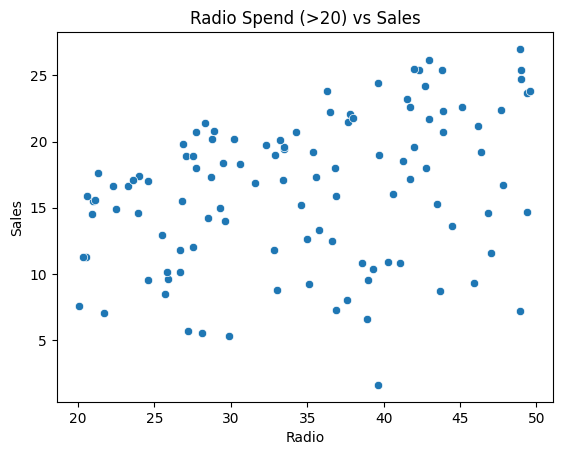

In [7]:
# Filter based on Radio spend
radio_filtered = df[df["Radio"] > 20]

sns.scatterplot(x="Radio", y="Sales", data=radio_filtered)
plt.title("Radio Spend (>20) vs Sales")
plt.show()


🔟 Build a Simple Predictive Model

In [8]:
X = df[["TV", "Radio", "Newspaper"]]
y = df["Sales"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

1️⃣1️⃣ Model Evaluation

In [9]:
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: 0.899438024100912
RMSE: 1.78159966153345


1️⃣2️⃣ Prediction Function

In [10]:
def predict_sales(tv, radio, newspaper):
    input_data = pd.DataFrame(
        [[tv, radio, newspaper]],
        columns=["TV", "Radio", "Newspaper"]
    )
    prediction = model.predict(input_data)
    return prediction[0]


1️⃣3️⃣ Manual Prediction (Notebook UX Pain)

In [11]:
predict_sales(tv=150, radio=30, newspaper=20)


np.float64(15.419568872288718)

1️⃣4️⃣ Export the Model

In [12]:
joblib.dump(model, "sales_prediction_model.pkl")
# model = joblib.load("sales_prediction_model.pkl")


['sales_prediction_model.pkl']